In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box
import osmnx as ox
import networkx as nx
from itertools import combinations
import multiprocessing as mp

print(f'Utilizando a versão {ox.__version__} do OSMNX')

print(f'Eu tenho {mp.cpu_count()} CPUs disponíveis')

Utilizando a versão 1.9.3 do OSMNX
Eu tenho 8 CPUs disponíveis


In [2]:
caminho = '/Users/marcelofernandes/Library/CloudStorage/GoogleDrive-marcelo.fernandes@alumni.usp.br/.shortcut-targets-by-id/1M--OnzbTYagrNv5Ss9fjWlBxCMmasz-Y/10_Mestrado_2021_Marcelo Fernandes/6_Qualificação/Mapas temáticos e figuras/BACIA_HIDROGRAFICA/SIRGAS_BACIAHIDROGRAFICA.shp'
my_crs = '4326' # Verificar em EPSG.io um projeção que te dê o resultado em metros
pesquisa_OD = '/Users/marcelofernandes/Library/CloudStorage/GoogleDrive-marcelo.fernandes@alumni.usp.br/.shortcut-targets-by-id/1M--OnzbTYagrNv5Ss9fjWlBxCMmasz-Y/10_Mestrado_2021_Marcelo Fernandes/8_Dados/Pesquisa OD 2017/OD-2017/Mapas-OD2017/Shape-OD2017/Zonas_2017_region.shp'
plt.style.use('ggplot')

verbose = False     # Flag para pular algumas atividades, com o objetivo de economizar memória.


O sistema de coordendadas utilizado é o EPSG:4326
Área de Contribuição Direta de Escoamento Difuso - Aricanduva/Tatuapé
Rio Aricanduva
Área de Contribuição Direta de Escoamento Difuso - Tiquatira/Aricanduva


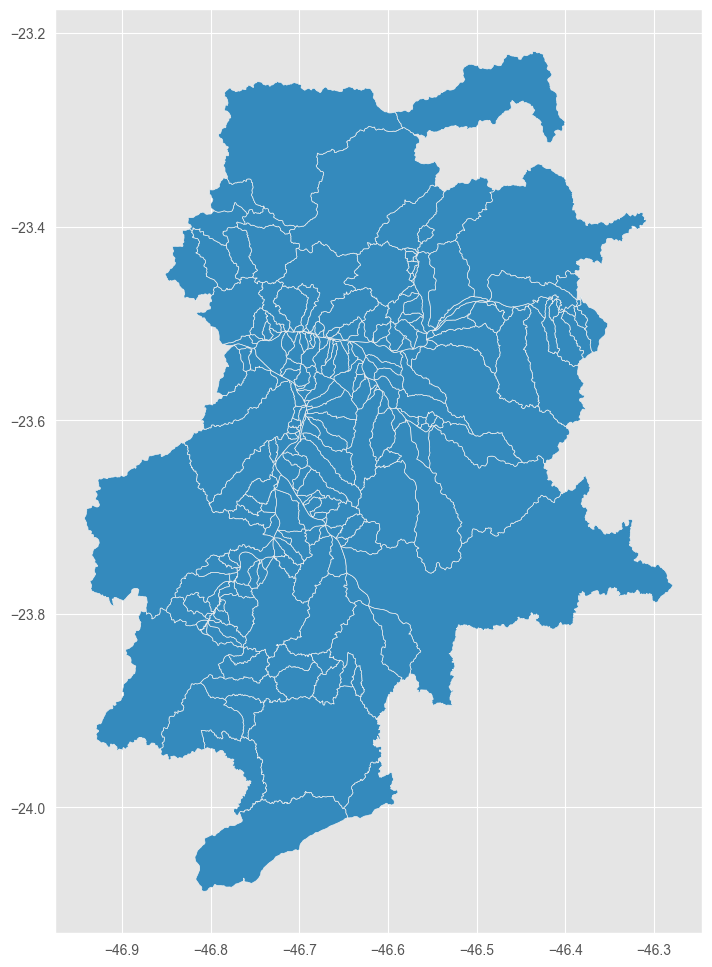

In [4]:
# Informações relevantes sobre os sistemas de coordenadas do GeoSampa
#Nota técnica: No GeoSampa são fornecidos arquivos tanto na projeção SAD69(96) como SIRGAS2000 e WGS84. 
#A projeção em SAD69(96) é fornecida apenas em caráter de compatibilidade com bases antigas, visto que, em 2014,
#foi definida a projeção UTM/SIRGAS2000 (EPGS: 31983) como a nova referência para o Sistema Geodésico Brasileiro (SGB)
# e para o Sistema Cartográfico Nacional (SCN). Desde então são consideradas oficiais apenas as informações
# produzidas tendo o Sirgas2000 como sistema geodésico.

# Read the shapefile
gdf = gpd.read_file(caminho)

# Atribuição do esquema de projeção
gdf = gdf.set_crs(epsg=31983)
gdf = gdf.to_crs(my_crs)

# Verifica o sistema de coordenadas
print(f'O sistema de coordendadas utilizado é o {gdf.crs}')

# Plotar o geodataframe
gdf.plot(figsize=(12,12))

# Verifica os nomes das bacias presentes no arquivo
bacias_unicas = gdf['BACIA_NOME'].unique()
#print(bacias_unicas)

# Bacia desejada
bacia = 'Aricanduva'

# Filtrar as linhas que contêm a palavra procurada
linhas_contendo_bacia = filter(lambda linha: bacia in linha, bacias_unicas)

# Converter o resultado de volta para uma lista, se necessário
linhas_contendo_bacia = list(linhas_contendo_bacia)

# Exibir as linhas encontradas

for linha in linhas_contendo_bacia:
    print(linha)

In [6]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    265 non-null    int32   
 1   ID          265 non-null    object  
 2   BACIA_PRIN  265 non-null    object  
 3   BACIA_NOME  265 non-null    object  
 4   AREA_KM     265 non-null    object  
 5   AREA_M      265 non-null    float64 
 6   PERIM_KM    265 non-null    float64 
 7   PERIM_M     265 non-null    float64 
 8   LANCAMENTO  265 non-null    object  
 9   ABRANGEN    265 non-null    object  
 10  geometry    265 non-null    geometry
dtypes: float64(3), geometry(1), int32(1), object(6)
memory usage: 21.9+ KB


In [7]:
caminhos_rios = '/Users/marcelofernandes/Library/CloudStorage/GoogleDrive-marcelo.fernandes@alumni.usp.br/.shortcut-targets-by-id/1M--OnzbTYagrNv5Ss9fjWlBxCMmasz-Y/10_Mestrado_2021_Marcelo Fernandes/8_Dados/Ughri16_hidrografia/Ughri16_hidrografia.shp'

O sistema de coordendadas utilizado é o EPSG:4326


<Axes: >

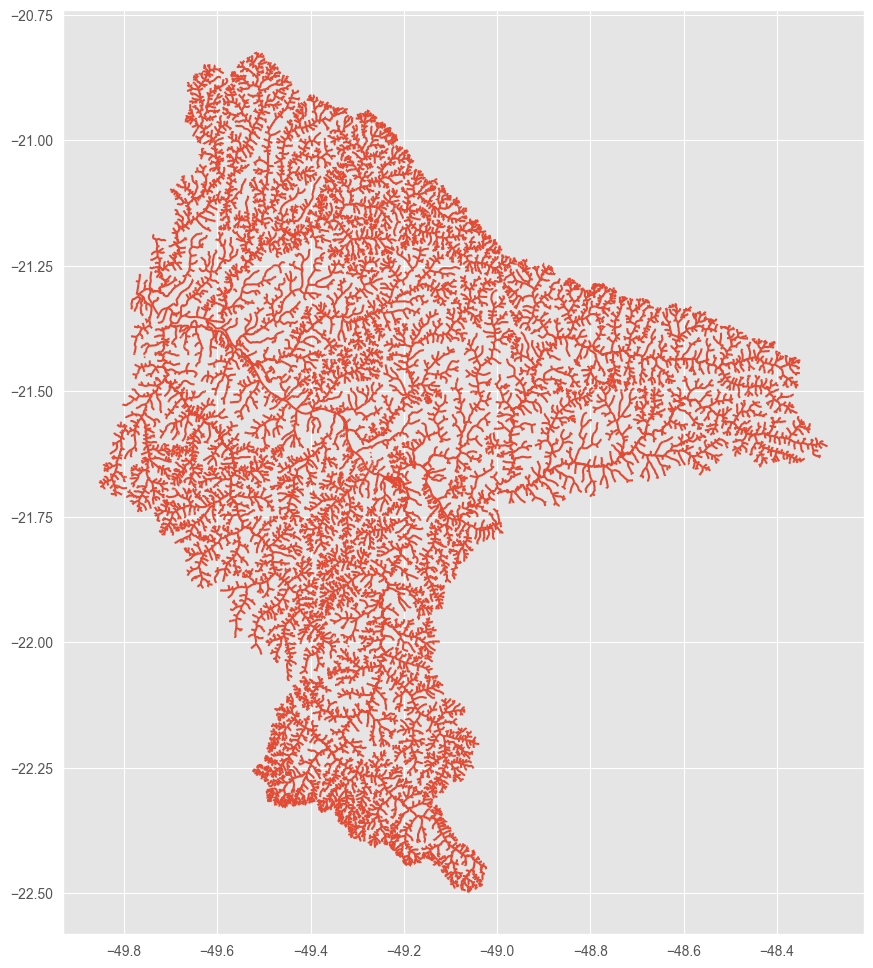

In [15]:
# Read the shapefile
gdf_rios = gpd.read_file(caminhos_rios)

#gdf_rios = gdf.to_crs(31983)
gdf_rios = gdf_rios.to_crs(4326)

# Verifica o sistema de coordenadas
print(f'O sistema de coordendadas utilizado é o {gdf_rios.crs}')

# Plotar o geodataframe
gdf_rios.plot(figsize=(12,12))

<Axes: >

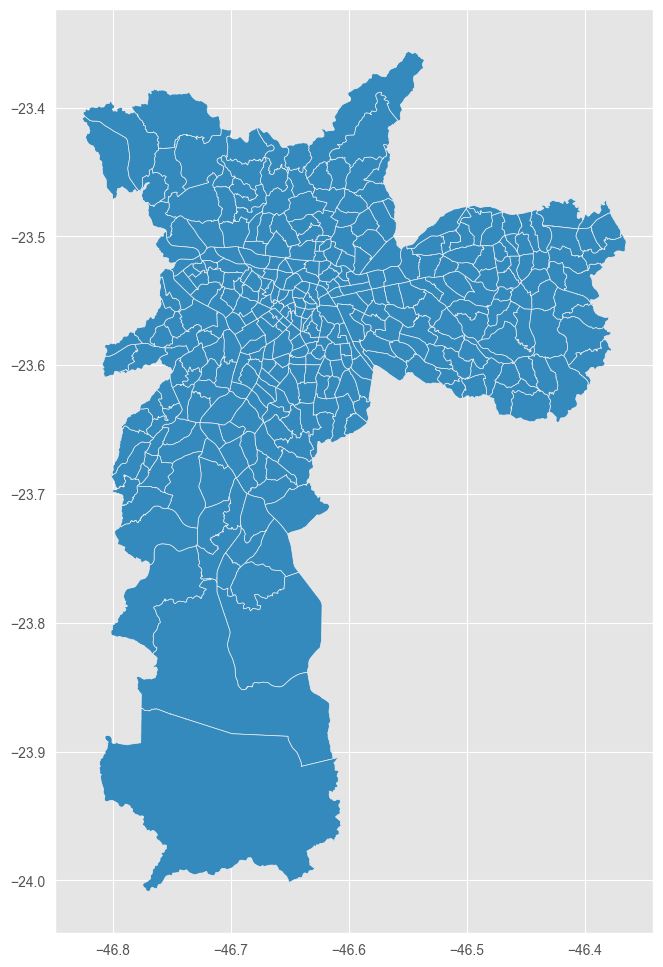

In [17]:
# Read the shapefile
gdf_OD = gpd.read_file(pesquisa_OD)

# Verifica o sistema de coordenadas
gdf_OD.crs

# Atribuição do esquema de projeção
gdf_OD = gdf_OD.to_crs(my_crs)

# Filtrando para o munícipio de São Paulo
gdf_indices=gdf_OD.index[gdf_OD['NomeMunici']=='São Paulo']
gdf_OD_SP = gdf_OD.loc[gdf_indices]
gdf_OD_SP.plot(figsize=(12,12))

In [19]:
import geopandas as gpd

# Verificando e ajustando os sistemas de coordenadas, se necessário
if gdf_rios.crs != gdf_OD_SP.crs:
    gdf_rios = gdf_rios.to_crs(gdf_OD_SP.crs)

# Filtrando os rios que estão dentro da cidade de São Paulo
sao_paulo_polygon = gdf_OD_SP.geometry.iloc[0]
gdf_rios_in_sp = gdf_rios[gdf_rios.geometry.within(sao_paulo_polygon)]

#gdf_rios_in_sp.plot(figsize=(12,12))

# Salvando o resultado em um novo arquivo
#gdf_rios_in_sp.to_file('rios_dentro_de_SP.shp')
#gdf_rios_in_sp.to_file('rios_dentro_de_SP.geojson', driver='GeoJSON')


ValueError: aspect must be finite and positive 

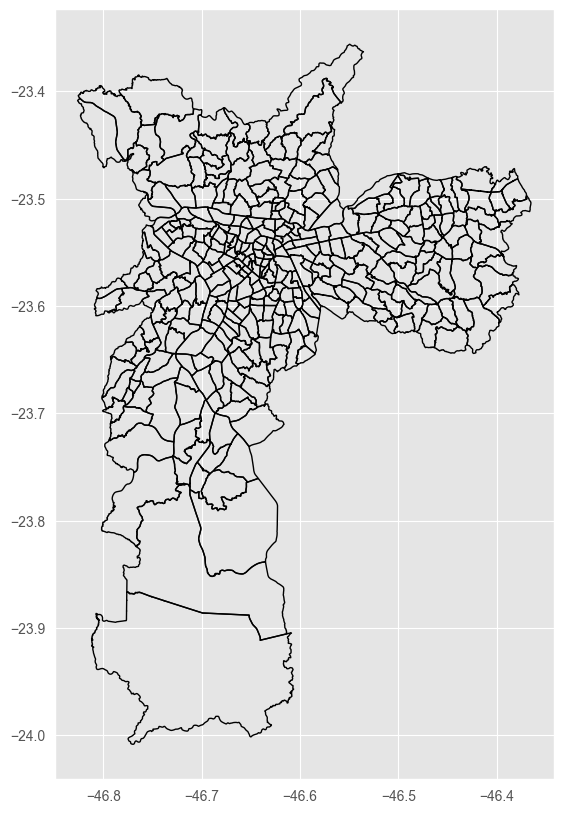

In [21]:
# Plotando o resultado
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf_OD_SP.boundary.plot(ax=ax, linewidth=1, color='black')
gdf_rios_in_sp.plot(ax=ax, color='blue')

plt.title('Rios dentro da Cidade de São Paulo')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

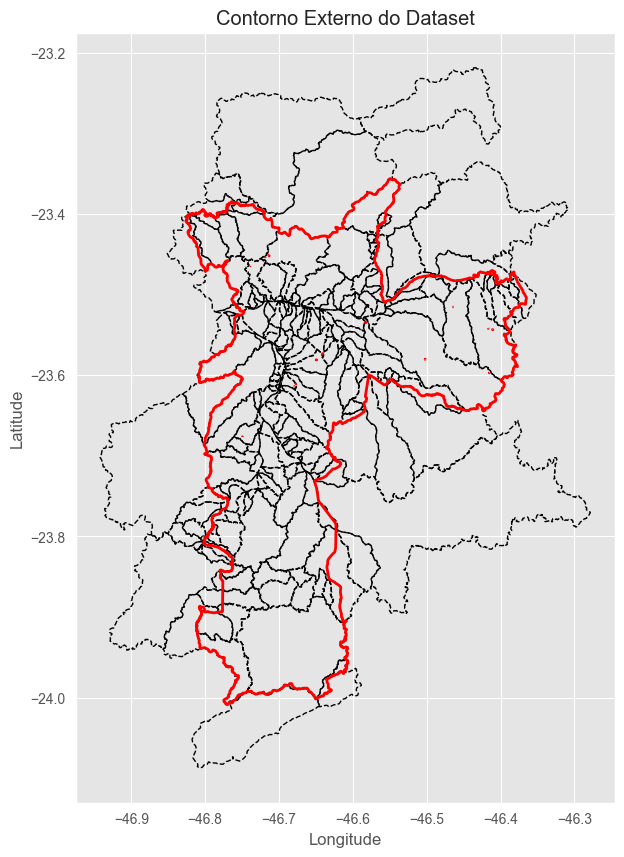

In [46]:
import geopandas as gpd
from shapely.ops import unary_union
from shapely.geometry import Polygon, MultiPolygon
import matplotlib.pyplot as plt

# Função para corrigir geometrias inválidas
def make_valid(geom):
    if not geom.is_valid:
        return geom.buffer(0)
    return geom

# Aplicando a função de correção a todas as geometrias
gdf_OD_SP['geometry'] = gdf_OD_SP['geometry'].apply(make_valid)

# Filtrando apenas geometrias válidas
gdf_OD_SP = gdf_OD_SP[gdf_OD_SP['geometry'].notnull()]

# Unindo todas as geometrias em uma única geometria
exterior = unary_union(gdf_OD_SP.geometry)

# Certificando-se de que o resultado seja um polígono ou multipolígono
if isinstance(exterior, (Polygon, MultiPolygon)):
    gdf_exterior = gpd.GeoDataFrame(geometry=[exterior], crs=gdf.crs)
else:
    raise ValueError("Resultado não é um polígono ou multipolígono válido.")

# Plotando o resultado
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.boundary.plot(ax=ax, linewidth=1, color='black', linestyle='--')
gdf_exterior.boundary.plot(ax=ax, linewidth=2, color='red')

plt.title('Contorno Externo do Dataset')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [45]:
exterior = unary_union(gdf_OD_SP.geometry)

GEOSException: TopologyException: side location conflict at -46.649704411838108 -23.581133829993366 0. This can occur if the input geometry is invalid.

In [32]:
caminhos_drenagem = '/Users/marcelofernandes/Library/CloudStorage/GoogleDrive-marcelo.fernandes@alumni.usp.br/.shortcut-targets-by-id/1M--OnzbTYagrNv5Ss9fjWlBxCMmasz-Y/10_Mestrado_2021_Marcelo Fernandes/8_Dados/SIRGAS_SHP_hidrolinha/SIRGAS_SHP_hidrolinha.shp'

<Axes: >

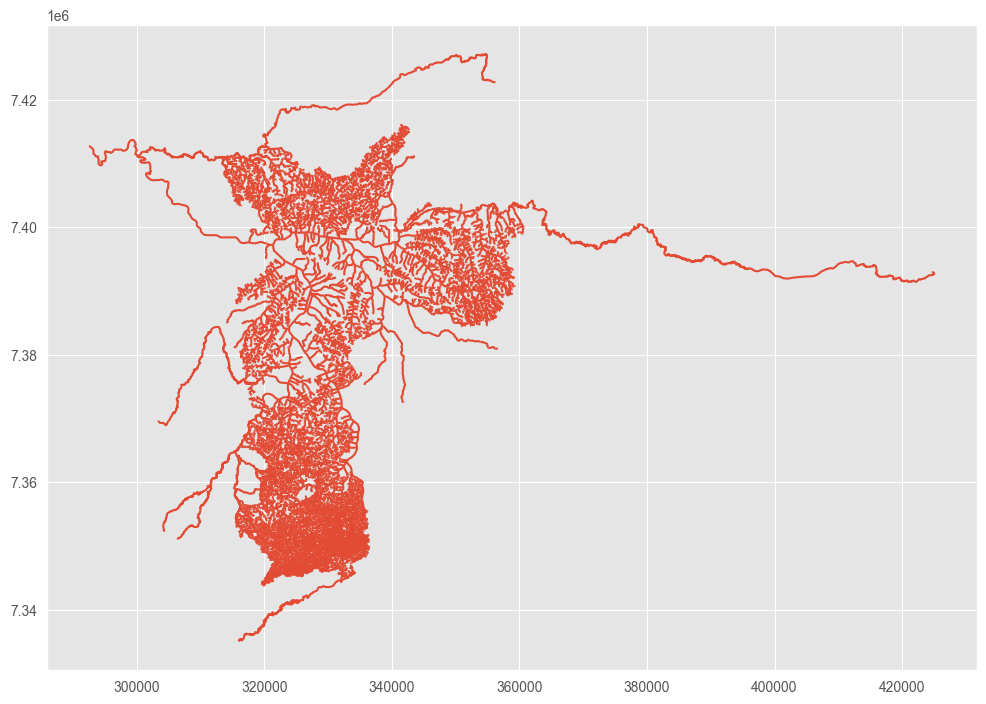

In [38]:
# Read the shapefile
gdf_drenagem = gpd.read_file(caminhos_drenagem)

# Verifica o sistema de coordenadas
#gdf_corpos.crs

# Atribuição do esquema de projeção
#gdf_drenagem = gdf_drenagem.to_crs(4326)
gdf_drenagem = gdf_drenagem.set_crs(31983)

# Filtrando para o munícipio de São Paulo
#gdf_indices=gdf_OD.index[gdf_OD['NomeMunici']=='São Paulo']
#gdf_OD_SP = gdf_OD.loc[gdf_indices]
gdf_drenagem.plot(figsize=(12,12))

<Axes: >

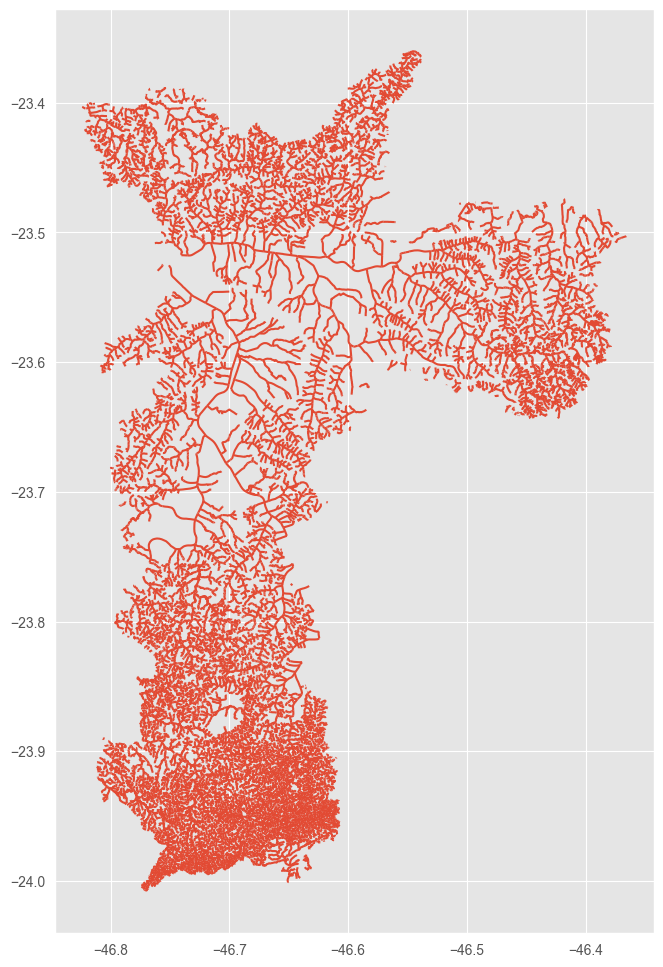

In [50]:
import geopandas as gpd

# Verificando e ajustando os sistemas de coordenadas, se necessário
if gdf_drenagem.crs != gdf_exterior.crs:
    print('Datasets com diferentes sistemas de coordenadas')
    gdf_drenagem = gdf_drenagem.to_crs(gdf_exterior.crs)

# Filtrando os rios que estão dentro da cidade de São Paulo
sao_paulo_polygon = gdf_exterior.geometry.iloc[0]
gdf_rios_in_sp = gdf_drenagem[gdf_drenagem.geometry.within(sao_paulo_polygon)]

gdf_rios_in_sp.plot(figsize=(12,12))

# Salvando o resultado em um novo arquivo
#gdf_rios_in_sp.to_file('rios_dentro_de_SP.shp')
#gdf_rios_in_sp.to_file('rios_dentro_de_SP.geojson', driver='GeoJSON')

<Axes: >

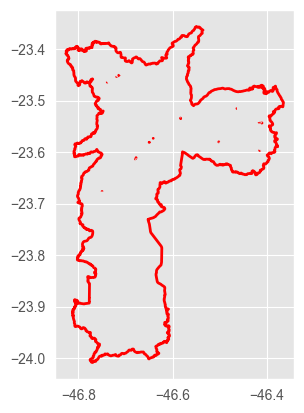

In [49]:
gdf_exterior.boundary.plot(linewidth=2, color='red')

ValueError: aspect must be finite and positive 

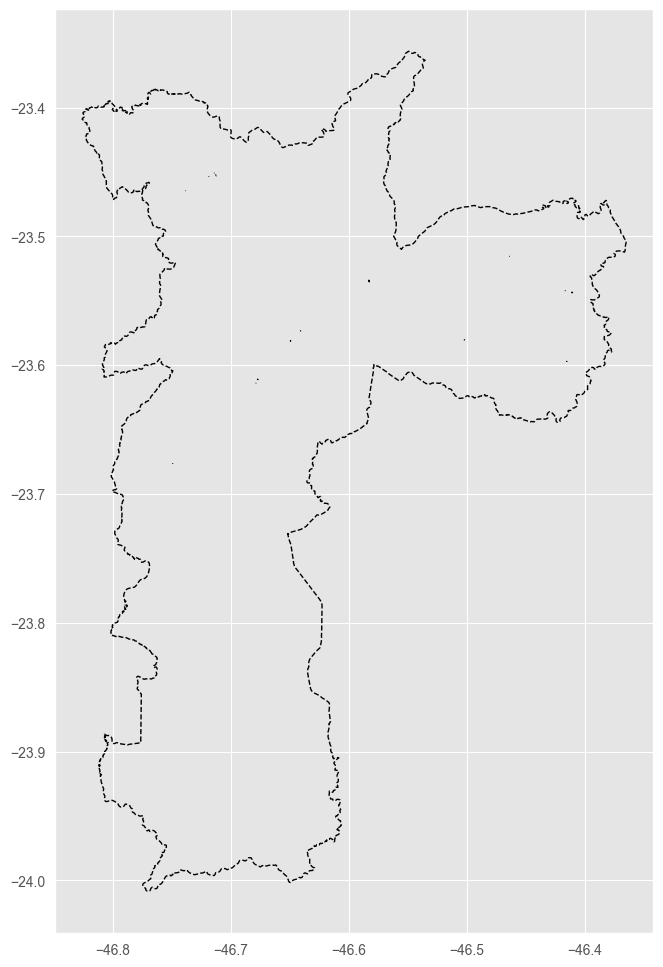

In [51]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Supondo que gdf_drenagem e gdf_exterior já foram carregados previamente

# Verificando e ajustando os sistemas de coordenadas, se necessário
if gdf_drenagem.crs != gdf_exterior.crs:
    print('Datasets com diferentes sistemas de coordenadas')
    gdf_drenagem = gdf_drenagem.to_crs(gdf_exterior.crs)

# Filtrando os rios que tocam o contorno exterior da cidade de São Paulo
sao_paulo_polygon = gdf_exterior.geometry.iloc[0]
gdf_rios_tocando_sp = gdf_drenagem[gdf_drenagem.geometry.touches(sao_paulo_polygon)]

# Plotando o resultado
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
gdf_exterior.boundary.plot(ax=ax, linewidth=1, color='black', linestyle='--', label='Contorno de SP')
gdf_rios_tocando_sp.plot(ax=ax, color='blue', label='Rios tocando SP')

plt.title('Rios que Tocam a Cidade de São Paulo')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

# Salvando o resultado em um novo arquivo
#gdf_rios_tocando_sp.to_file('rios_tocando_SP.shp')
#gdf_rios_tocando_sp.to_file('rios_tocando_SP.geojson', driver='GeoJSON')


In [52]:
gdf_rios_tocando_sp

,hl_tp_acid,hl_acident,geometry


In [57]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Supondo que gdf_drenagem e gdf_exterior já foram carregados previamente

gdf_exterior = gdf_exterior.set_crs(31983, allow_override=True)
gdf_drenagem = gdf_drenagem.set_crs(31983, allow_override=True)

In [62]:
# Verificando e ajustando os sistemas de coordenadas, se necessário
if gdf_drenagem.crs != gdf_exterior.crs:
    print('Datasets com diferentes sistemas de coordenadas')
    gdf_drenagem = gdf_drenagem.to_crs(gdf_exterior.crs)

# Criando um buffer de 5 metros ao redor do contorno exterior
buffer_5m = gdf_exterior.geometry.buffer(5)

# Filtrando os rios que tocam o buffer
buffer_union = buffer_5m.unary_union if hasattr(buffer_5m, 'unary_union') else buffer_5m.union_all()
gdf_rios_tocando_buffer = gdf_drenagem[gdf_drenagem.geometry.touches(buffer_union)]

/var/folders/8y/8z4lzw294m5c0kf05d8ww4r00000gn/T/ipykernel_29433/144981327.py:10: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  buffer_union = buffer_5m.unary_union if hasattr(buffer_5m, 'unary_union') else buffer_5m.union_all()


/var/folders/8y/8z4lzw294m5c0kf05d8ww4r00000gn/T/ipykernel_29433/677180263.py:6: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  gdf_rios_tocando_buffer.plot(ax=ax, color='green', label='Rios tocando o Buffer')


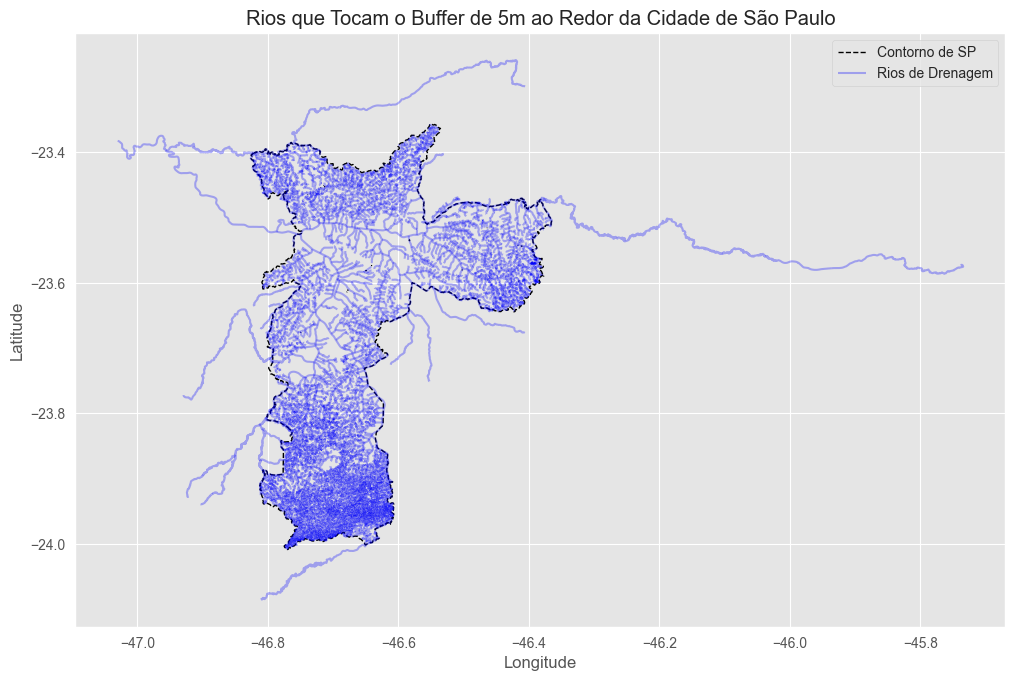

In [66]:
# Plotando o resultado
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
gdf_exterior.boundary.plot(ax=ax, linewidth=1, color='black', linestyle='--', label='Contorno de SP')
gdf_drenagem.plot(ax=ax, color='blue', alpha=0.3, label='Rios de Drenagem')
#buffer_5m.boundary.plot(ax=ax, linewidth=1, color='red', linestyle='-', label='Buffer de 5m')
gdf_rios_tocando_buffer.plot(ax=ax, color='green', label='Rios tocando o Buffer')

plt.title('Rios que Tocam o Buffer de 5m ao Redor da Cidade de São Paulo')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

# Salvando o resultado em um novo arquivo
#gdf_rios_tocando_buffer.to_file('rios_tocando_buffer_SP.shp')
#gdf_rios_tocando_buffer.to_file('rios_tocando_buffer_SP.geojson', driver='GeoJSON')


In [54]:
gdf_exterior.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich